In [1]:
from functools import wraps
from time import time
import random
import string
import pandas as pd
import numpy as np
from multiprocessing import Pool
from scipy import stats
from itertools import product
from collections import Counter
import copy


def random_soup(length):
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str

def timeit(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        res = f(*args, **kw)
        te = time()
        return [res, float('%0.7f' % (te-ts))]
    return wrap


    
class Soupers:

    @staticmethod
    @timeit
    def souperOs(word, soup):
        """
        Big O Notation: O(s)
        """
        return all(map(lambda x: x in soup, list(word)))
    
    
    @staticmethod
    @timeit            
    def souperOsm(word, soup):
        """
        Big O Notation: O(S) + O(m)
        """
        # O(n)
        letters = Counter(word)
        # O(S)
        for c in soup:
            if c not in letters:
                pass
            elif letters[c] == 1:
                del letters[c]
                if not letters:
                    return True
            else:
                letters[c] -= 1
        return False
    
    
    @staticmethod
    @timeit 
    def souperOlogn(word, soup):
        """
        Big O Notation: O(n) *  O(log(n))
        """
        init_word = copy.deepcopy(word)
        word = list(word)
        soup = list(soup)
        final = []
        while word != []:
            for letter in word:
                if letter in soup:
                    final.append(letter)
                    word.remove(letter)
                    soup.remove(letter)
                elif letter not in soup:
                    word.remove(letter)
            continue

        if sorted(final) == sorted(list(init_word)):
            return True
        else:
            return False
    
    @staticmethod
    @timeit 
    def souperOn(word, soup):
        """
        Big O Notation: O(n)
        """
        d = [0 for i in range(128)]
        for c in soup:
            d[ord(c)] +=1
        for c in word:
            if(d[ord(c)] == 0):
                return False
        else:     
            d[ord(c)] -= 1
        return True 
    
    @staticmethod
    @timeit
    def souperOn2(word: str, soup: str, d: dict={}):
        """
        Big O Notation: O(n)
        """
        for c in soup: d[c] = d.get(c, 0) + 1
        res = all([False if not d.get(w, None) else True for w in word])
        return res
 

    @staticmethod
    @timeit
    def souperOn3(words, soup):
        """
        Big O Notation: O(n)
        """

        def fix_tree(i_from, i_to, el_c):
            el_top = el_c[i_from-1]
            while True:
                i_from_twice = i_from*2
                if i_from_twice > i_to:
                    break
                else:
                    el_left = el_c[i_from_twice-1]
                    if i_from_twice == i_to:
                        el_right = el_left
                    else:
                        el_right = el_c[i_from_twice]

                    if (el_right > el_top) and (el_right > el_left):
                        el_c[i_from-1] = el_right
                        i_from = i_from_twice+1
                    elif el_left > el_top:
                        el_c[i_from-1] = el_left
                        i_from = i_from_twice
                    else:
                        break

            el_c[i_from-1] = el_top

        i_num_a = len(words)
        el_a = list(words)

        i_num_b = len(soup)
        el_b = list(soup)

        for i in range(i_num_a // 2, 0, -1):
            fix_tree(i, i_num_a, el_a)

        for i in range(i_num_b // 2, 0, -1):
            fix_tree(i, i_num_b, el_b)

        for i in range(i_num_a, 1, -1):
            el_a[0], el_a[i-1] = el_a[i-1], el_a[0]
            fix_tree(1, i-1, el_a)

        for i in range(i_num_b, 1, -1):
            el_b[0], el_b[i-1] = el_b[i-1], el_b[0]
            fix_tree(1, i-1, el_b)

        i = 1
        j = 1
        while i <= i_num_a and j <= i_num_b:
            if j <= i_num_b and el_a[i-1] > el_b[j-1]:
                j += 1
            if j <= i_num_b and el_a[i-1] < el_b[j-1]:
                return False
            if j > i_num_b:
                return False
            if (j <= i_num_b) and el_a[i-1] == el_b[j-1]:
                if (j == i_num_b) and (i == i_num_a):
                    return True
                if (j == i_num_b) and (i < i_num_a):
                    return False
                elif  (i < i_num_a) and (el_a[i] < el_b[j]):
                    return False
                elif (i < i_num_a) and (j < i_num_b) and (el_a[i] >= el_b[j]):
                    i += 1
                    j += 1
                else:
                    i += 1
                if i > i_num_a:
                    return True
                


In [2]:

##########################################################################################
####   Plot of the evolution of time required with progressive soup size increasing   ####
##########################################################################################

word = 'dermatoglyphics'

def souper_counter(func, length):
    sfunc = getattr(Soupers, func)
    soup = random_soup(length)
    time = sfunc(word, soup)
    res = [length, time[1], sfunc.__name__]
    return res

def souper_plotter(total:int=10000, outliers_index:int=3, exclude=[]):
    soupers = filter(lambda x: 'souper' in x, dir(Soupers))
    soupers = list(filter(lambda x: all(e not in x for e in exclude), soupers)) if exclude else soupers  
    iterations = range(20, total, 10)
    args = product(soupers, iterations)
    
    pool = Pool()
    data = pool.starmap(souper_counter, args)
    df = pd.DataFrame(data=data, columns = ["word_length", "time_execution", "Onotation"])
    df = df[(np.abs(stats.zscore(df.iloc[:,0:2])) < outliers_index).all(axis=1)]
    df = df.pivot(index='word_length', columns='Onotation', values='time_execution')
    df.plot(figsize=(13,10))
    print(df.describe())


Onotation      souperOs    souperOsm
count      3.995000e+03  3993.000000
mean       8.499099e-06     0.000039
std        6.547299e-06     0.000019
min        7.000000e-07     0.000011
25%        4.300000e-06     0.000027
50%        8.300000e-06     0.000039
75%        1.070000e-05     0.000045
max        1.757000e-04     0.000292


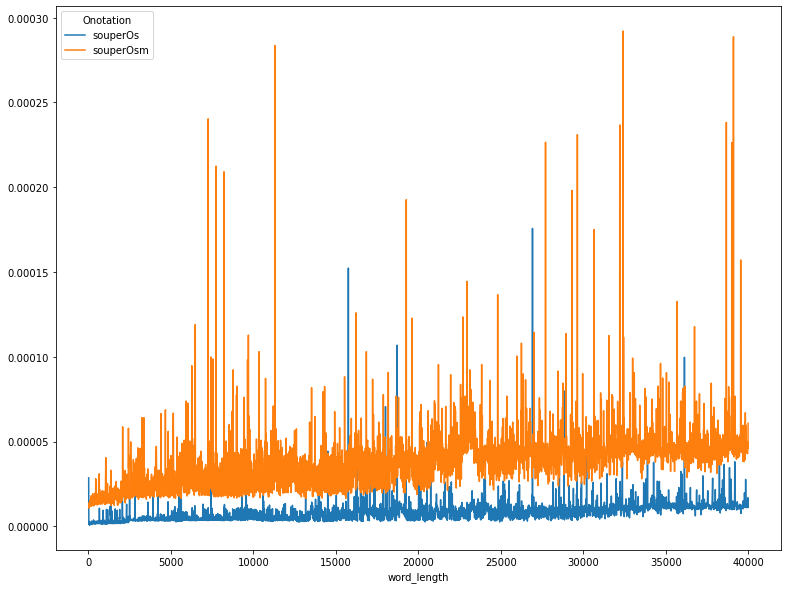

In [9]:

# Get statistics and plot time spent regarding to the soup's size
    
souper_plotter(40000, exclude=['On', 'Olog'])

Onotation  souperOlogn     souperOs    souperOsm
count      2948.000000  2998.000000  2997.000000
mean          0.000272     0.000010     0.000060
std           0.000413     0.000019     0.000155
min           0.000015     0.000001     0.000011
25%           0.000119     0.000006     0.000032
50%           0.000210     0.000010     0.000041
75%           0.000275     0.000011     0.000046
max           0.004713     0.000706     0.003795


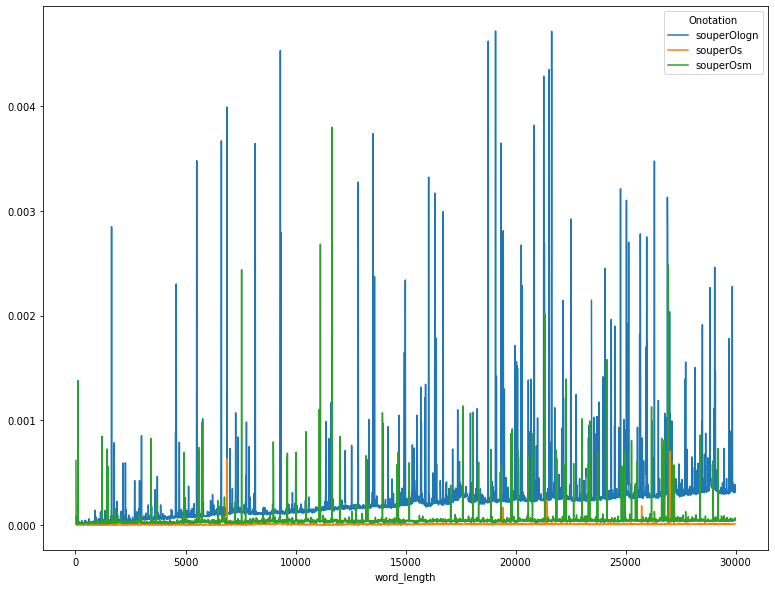

In [4]:

# Get statistics and plot time spent regarding to the soup's size
    
souper_plotter(30000, exclude=['On'])


Onotation    souperOn   souperOn2
count      979.000000  979.000000
mean         0.000526    0.000595
std          0.000418    0.000417
min          0.000008    0.000005
25%          0.000215    0.000264
50%          0.000435    0.000557
75%          0.000717    0.000815
max          0.002212    0.002168


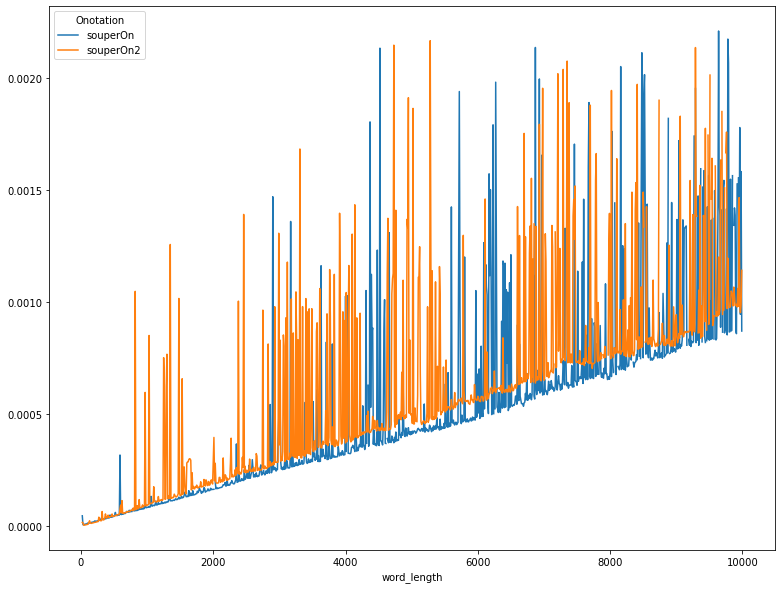

In [5]:

# Get statistics and plot time spent regarding to the soup's size
    
souper_plotter(10000, exclude=['Os', 'Olog', 'On3'])


Onotation    souperOn   souperOn2   souperOn3
count      498.000000  498.000000  464.000000
mean         0.000292    0.000344    0.008891
std          0.000405    0.000339    0.006147
min          0.000008    0.000005    0.000045
25%          0.000113    0.000146    0.003194
50%          0.000215    0.000271    0.007770
75%          0.000350    0.000411    0.013932
max          0.006061    0.003341    0.023221


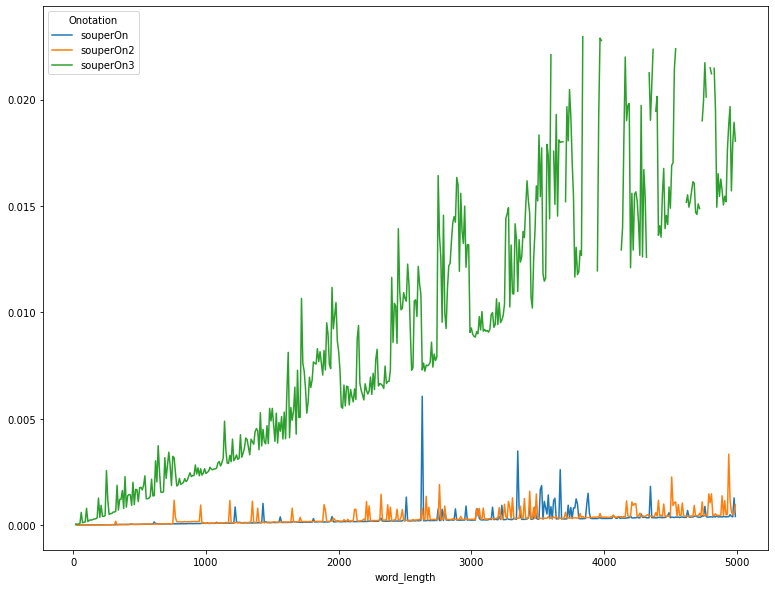

In [6]:

# Get statistics and plot time spent regarding to the soup's size
    
souper_plotter(5000, exclude=['Os', 'Olog'])


Onotation  souperOlogn    souperOn   souperOn2    souperOs   souperOsm
count       997.000000  963.000000  964.000000  998.000000  998.000000
mean          0.000105    0.000583    0.000712    0.000007    0.000023
std           0.000136    0.000558    0.000842    0.000007    0.000033
min           0.000014    0.000009    0.000007    0.000001    0.000010
25%           0.000048    0.000241    0.000284    0.000004    0.000018
50%           0.000083    0.000524    0.000536    0.000005    0.000020
75%           0.000122    0.000760    0.000885    0.000007    0.000024
max           0.002109    0.006924    0.006672    0.000149    0.000827


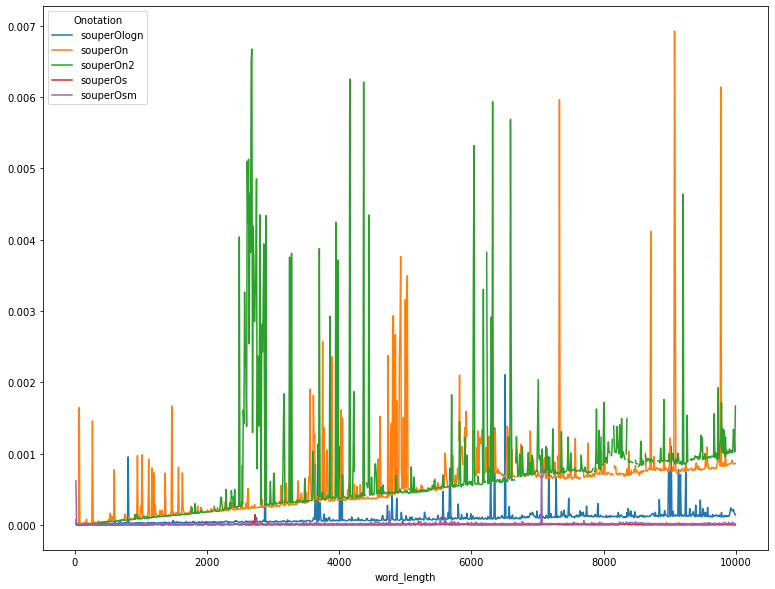

In [7]:
# Get statistics and plot time spent regarding to the soup's size
    
souper_plotter(10000, exclude=['On3'])

Onotation  souperOlogn    souperOn   souperOn2   souperOn3      souperOs  \
count       498.000000  498.000000  498.000000  400.000000  4.980000e+02   
mean          0.000045    0.000207    0.000234    0.005611  4.829719e-06   
std           0.000044    0.000127    0.000162    0.003437  5.904573e-06   
min           0.000015    0.000007    0.000005    0.000039  7.000000e-07   
25%           0.000030    0.000104    0.000116    0.002634  3.600000e-06   
50%           0.000044    0.000201    0.000226    0.005518  4.100000e-06   
75%           0.000056    0.000303    0.000335    0.008634  4.300000e-06   
max           0.000861    0.001043    0.001459    0.011335  9.420000e-05   

Onotation   souperOsm  
count      498.000000  
mean         0.000026  
std          0.000023  
min          0.000011  
25%          0.000017  
50%          0.000020  
75%          0.000027  
max          0.000287  


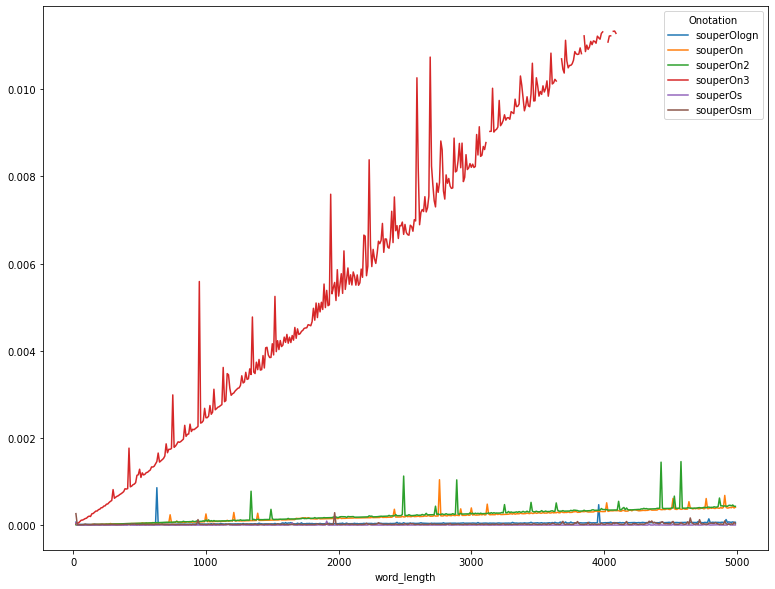

In [8]:

# Get statistics and plot time spent regarding to the soup's size
    
souper_plotter(5000)